In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import opendatasets as od

dataset_url = ('https://www.kaggle.com/berkayalan/2021-olympics-medals-in-tokyo')
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: astorlohmannpalmeira
Your Kaggle Key: ········


100%|██████████| 1.17k/1.17k [00:00<00:00, 250kB/s]

In [8]:
#Lendo do DataFrame:

medals_df = pd.read_csv('./2021-olympics-medals-in-tokyo/Tokyo Medals 2021.csv')

medals_df

,Country,Gold Medal,Silver Medal,Bronze Medal,Total,Rank By Total
0,United States of America,39,41,33,113,1
1,People's Republic of China,38,32,18,88,2
2,Japan,27,14,17,58,5
3,Great Britain,22,21,22,65,4
4,ROC,20,28,23,71,3
...,...,...,...,...,...,...
88,Ghana,0,0,1,1,77
89,Grenada,0,0,1,1,77
90,Kuwait,0,0,1,1,77
91,Republic of Moldova,0,0,1,1,77


In [15]:
medals_df.shape

(93, 6)

In [19]:
medals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country        93 non-null     object
 1   Gold Medal     93 non-null     int64 
 2   Silver Medal   93 non-null     int64 
 3   Bronze Medal   93 non-null     int64 
 4   Total          93 non-null     int64 
 5   Rank By Total  93 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 4.5+ KB


In [20]:
#Verificando valores Nulos:

medals_df.isnull().sum()

Country          0
Gold Medal       0
Silver Medal     0
Bronze Medal     0
Total            0
Rank By Total    0
dtype: int64

In [21]:
medals_df.columns

Index(['Country', 'Gold Medal', 'Silver Medal', 'Bronze Medal', 'Total',
       'Rank By Total'],
      dtype='object')

In [24]:
#Renomeando as colunas:

medals_df.rename(columns={'Gold Medal':'Gold',
                            "Silver Medal":"Silver",
                            'Bronze Medal':'Bronze',
                            "Rank By Total":'World_rank'
                           },inplace=True)

medals_df

,Country,Gold,Silver,Bronze,Total,World_rank
0,United States of America,39,41,33,113,1
1,People's Republic of China,38,32,18,88,2
2,Japan,27,14,17,58,5
3,Great Britain,22,21,22,65,4
4,ROC,20,28,23,71,3
...,...,...,...,...,...,...
88,Ghana,0,0,1,1,77
89,Grenada,0,0,1,1,77
90,Kuwait,0,0,1,1,77
91,Republic of Moldova,0,0,1,1,77


# Análise dos Dados:

In [36]:
#Quais foram os 10 paises que ganharam mais medalhas?

top10rank_df = medals_df.sort_values('World_rank', ascending=True).head(10)

top10rank_df

,Country,Gold,Silver,Bronze,Total,World_rank
0,United States of America,39,41,33,113,1
1,People's Republic of China,38,32,18,88,2
4,ROC,20,28,23,71,3
3,Great Britain,22,21,22,65,4
2,Japan,27,14,17,58,5
5,Australia,17,7,22,46,6
9,Italy,10,10,20,40,7
8,Germany,10,11,16,37,8
6,Netherlands,10,12,14,36,9
7,France,10,12,11,33,10


In [37]:
#Quais foram os 10 países que mais ganharam medalhas de ouro?

top10goldrank_df = medals_df.sort_values('Gold', ascending=False).head(10)
top10goldrank_df

,Country,Gold,Silver,Bronze,Total,World_rank
0,United States of America,39,41,33,113,1
1,People's Republic of China,38,32,18,88,2
2,Japan,27,14,17,58,5
3,Great Britain,22,21,22,65,4
4,ROC,20,28,23,71,3
5,Australia,17,7,22,46,6
6,Netherlands,10,12,14,36,9
7,France,10,12,11,33,10
8,Germany,10,11,16,37,8
9,Italy,10,10,20,40,7


In [40]:
#Quais foram os 10 países que mais ganharam medalhas de Prata?

top10silverrank_df = medals_df.sort_values('Silver', ascending=False).head(10)
top10silverrank_df

,Country,Gold,Silver,Bronze,Total,World_rank
0,United States of America,39,41,33,113,1
1,People's Republic of China,38,32,18,88,2
4,ROC,20,28,23,71,3
3,Great Britain,22,21,22,65,4
2,Japan,27,14,17,58,5
6,Netherlands,10,12,14,36,9
7,France,10,12,11,33,10
8,Germany,10,11,16,37,8
9,Italy,10,10,20,40,7
21,Spain,3,8,6,17,17


In [41]:
#Quais foram os 10 países que mais ganharam medalhas de Prata?

top10bronzerank_df = medals_df.sort_values('Bronze', ascending=False).head(10)
top10bronzerank_df

,Country,Gold,Silver,Bronze,Total,World_rank
0,United States of America,39,41,33,113,1
4,ROC,20,28,23,71,3
3,Great Britain,22,21,22,65,4
5,Australia,17,7,22,46,6
9,Italy,10,10,20,40,7
1,People's Republic of China,38,32,18,88,2
2,Japan,27,14,17,58,5
8,Germany,10,11,16,37,8
6,Netherlands,10,12,14,36,9
43,Ukraine,1,6,12,19,16


In [39]:
#Onde está o Brasil no Ranking?

brasil_rank=medals_df.query('Country=="Brazil"')
brasil_rank

,Country,Gold,Silver,Bronze,Total,World_rank
11,Brazil,7,6,8,21,12


# Visualização de dados

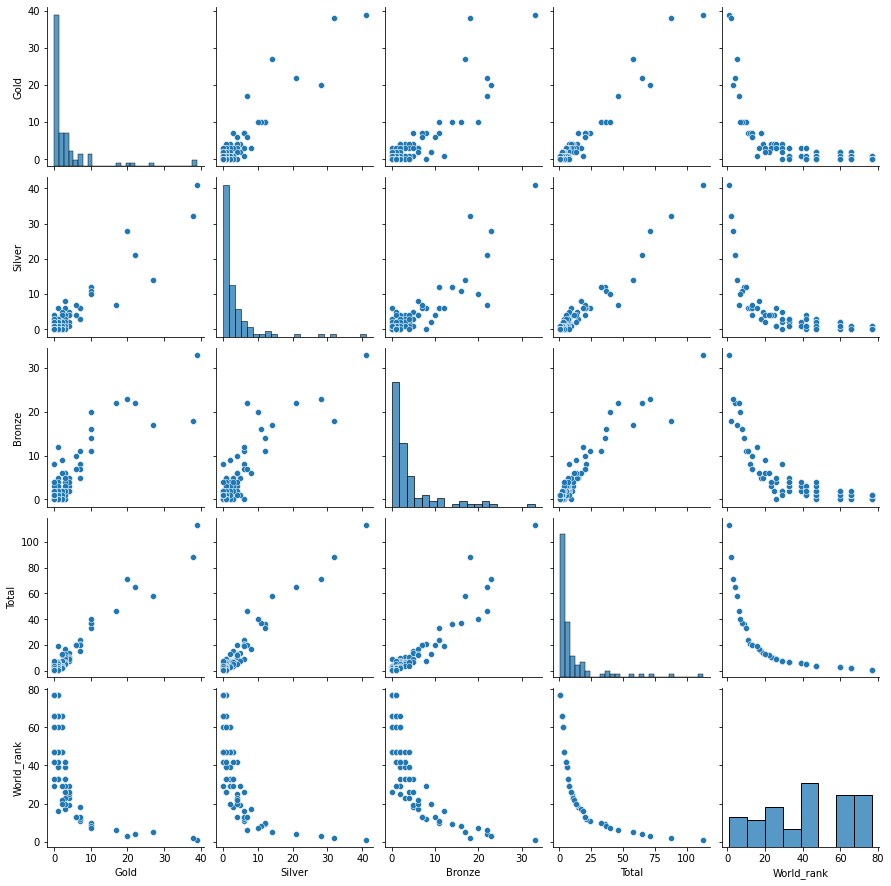

In [46]:
#Distribuição dos dados:

sns.pairplot(medals_df, diag_kind="hist");

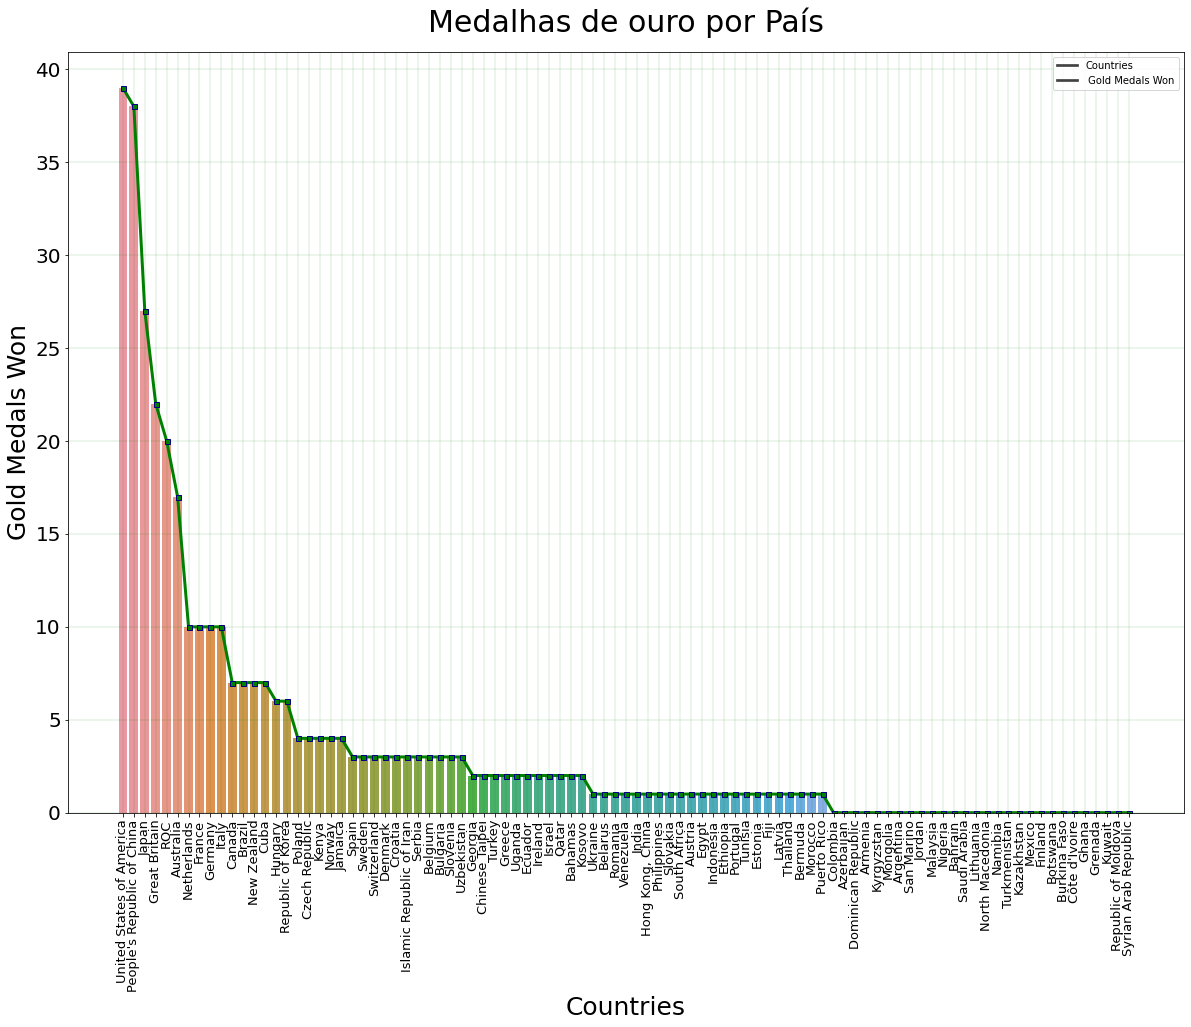

In [53]:
#Plotando os paises com maiores número de medalhas de ouro no gráfico:

plt.figure(figsize=(20,14))
sns.barplot(x='Country',y='Gold',data=medals_df)
plt.plot(medals_df.Country,medals_df.Gold,marker='s',c='g',ls='-',lw=3,ms=5,mew=1,mec='navy');
plt.tick_params(axis='x',which='major',labelsize=13,rotation=90)
plt.tick_params(axis='y',which='major',labelsize=20)
plt.title("Medalhas de Ouro por País",fontsize=30,pad=20)
plt.xlabel("Countries",fontsize=25)
plt.ylabel("Gold Medals Won",fontsize=25)
plt.legend(['Countries',' Gold Medals Won']);
plt.grid(color='g',linestyle='-',linewidth=0.3,alpha=0.5)

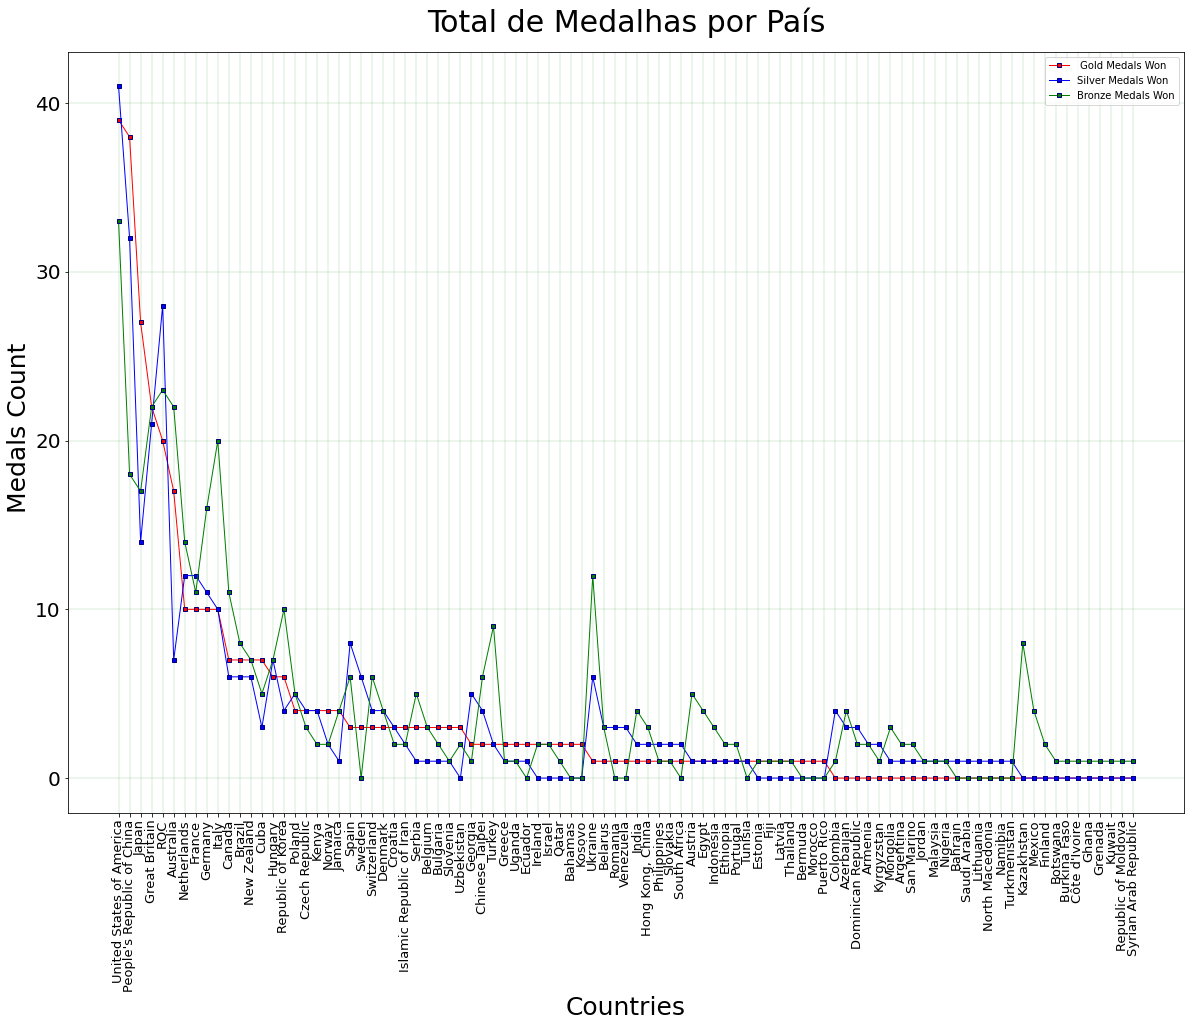

In [54]:
#Plotando os paises com maiores número de medalhas no gráfico:

plt.figure(figsize=(20,14))
plt.plot(medals_df.Country,medals_df.Gold,marker='s',c='r',ls='-',lw=1,ms=4,mew=1,mec='navy');
plt.plot(medals_df.Country,medals_df.Silver,marker='s',c='b',ls='-',lw=1,ms=4,mew=1,mec='navy');
plt.plot(medals_df.Country,medals_df.Bronze,marker='s',c='g',ls='-',lw=1,ms=4,mew=1,mec='navy');

plt.tick_params(axis='x',which='major',labelsize=13,rotation=90)
plt.tick_params(axis='y',which='major',labelsize=20)
plt.title("Total de Medalhas por País",fontsize=30,pad=20)
plt.xlabel("Countries",fontsize=25)
plt.ylabel(" Medals Count",fontsize=25)
plt.legend([' Gold Medals Won','Silver Medals Won','Bronze Medals Won']);
plt.grid(color='g',linestyle='-',linewidth=0.3,alpha=0.5)